## Kartenbildung
Gegeben ist das Notebook, das wir in der Vorlesung zusammen entwickelt haben. Wir haben den Pfad des Roboters in die Karte (gridmap) eingetragen.

Trage nun die Messwerte des Abstandssensors `distance3` ein. Zu jedem Zeitpunkt steht in dieser Liste eine Liste mit 12 Einträgen. Jeder Eintrag ist ein Abstandswert mit einem bestimmten Winkel relativ zur Blickrichtung des Roboters. Diese sind: `[57, 49, 41, 33, 14.7, 3.6, -4.0, -12.2, -33, -41, -49, -57]`. Beachte auch: Die Abstandswerte sind in mm angegeben, bisher haben wir aber in cm gerechnet.

Trage für die Wände eine `-1` ein.
Ich habe die Karte vergrößert, es sollte alles drauf passen.

Wie du die Aufgabe löst, ist dir überlassen. Du kannst die Roboterklasse erweitern oder mit einer weiteren Liste (siehe `robot_path`) arbeiten.

Die letzte Zelle in diesem Notebook ist eine kleine Version der Karte, wie sie aussehen soll (als Hilfe). Bitte führe diese Zelle nicht aus, dann verschwindet das Bild.

In [59]:
import numpy as np
import matplotlib.pyplot as plt

In [60]:
odometryL, odometryR, distance1, distance2, distance3, distance4 = np.load("./slam_data_big.npy", allow_pickle=True)

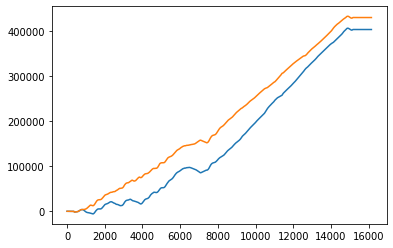

In [61]:
plt.plot(odometryL)
plt.plot(odometryR)
plt.show()

In [62]:
class Robot():
    def __init__(s, x=0, y=0, phi=0):
        s.x, s.y, s.phi = x, y, phi
        s.old_right = 0
        s.old_left = 0
        
    def move(s, right, left):
        d_right = (right - s.old_right)/2048*np.pi
        s.old_right = right
        d_left = (left - s.old_left)/2048*np.pi
        s.old_left = left
        forward = 8.4/2*(d_right + d_left)
        turn = 8.4/47.5 * (d_right - d_left)
        s.x += np.cos(s.phi) * forward
        s.y += np.sin(s.phi) * forward
        s.phi = (s.phi + turn) % (2*np.pi)
    

In [63]:
robot_path = []
R = Robot(phi=-2.3)

for l, r in zip(odometryL, odometryR):
    R.move(r,l)
    robot_path.append((R.x, R.y, R.phi))

robot_path = np.array(robot_path)

In [64]:
robot_path.shape

(16141, 3)

In [65]:
print("Max x:", np.max(robot_path[:,0]), "Min x:", np.min(robot_path[:,0]))
print("Max y:", np.max(robot_path[:,1]), "Min y:", np.min(robot_path[:,1]))

Max x: 312.7754516495169 Min x: -845.5346785872141
Max y: 652.4473003814066 Min y: -63.41401256908361


In [66]:
robot_path += np.array([1000, 300, 0])

In [67]:
print("Max x:", np.max(robot_path[:,0]), "Min x:", np.min(robot_path[:,0]))
print("Max y:", np.max(robot_path[:,1]), "Min y:", np.min(robot_path[:,1]))

Max x: 1312.775451649517 Min x: 154.4653214127859
Max y: 952.4473003814066 Min y: 236.5859874309164


In [68]:
Map = np.zeros((1800, 1200))

for x,y,phi in robot_path:
    Map[int(x+0.5), int(y+0.5)] = 1
    
x0, y0 = robot_path[0,0:2]
x0 = int(x0+0.5)
y0 = int(y0+0.5)
Map[x0-4:x0+4, y0-4:y0+4] = 1


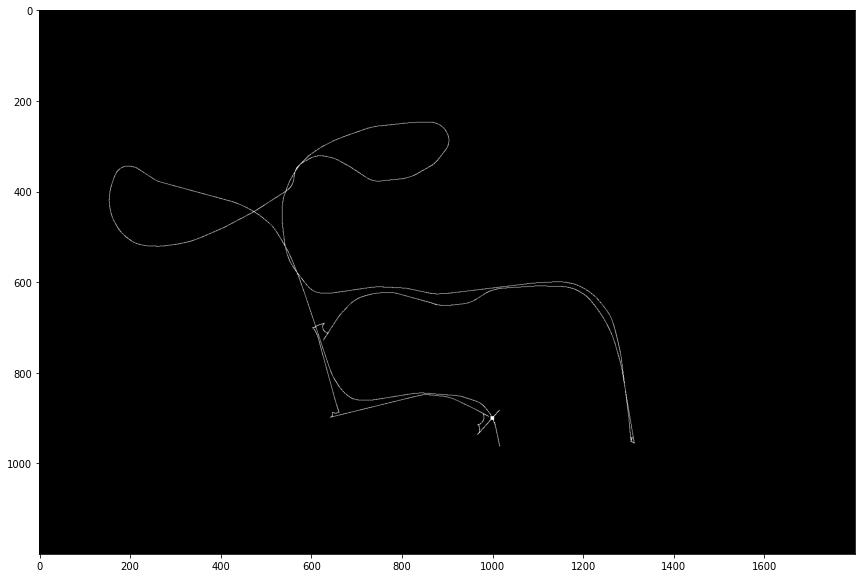

In [69]:
plt.figure(figsize=(20,10))
plt.imshow(np.rot90(Map,1), cmap="gray")

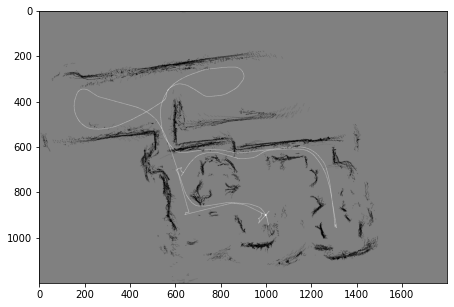

In [58]:
plt.figure(figsize=(10,5))
plt.imshow(np.rot90(Map,1), cmap="gray")